In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv
scv.settings.verbosity = 0
import unitvelo as utv

(Running UniTVelo 0.1.6)
2022-06-04 09:38:20


2022-06-04 17:38:20.743108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
sc.settings.set_figure_params(dpi=80)

In [9]:
# load data from seurat h5ad
adata = sc.read_h5ad('/home/yiming/vio_analysis/myed18/adata_emb_spl.h5ad')
adata

AnnData object with n_obs × n_vars = 1443 × 27050
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'DF.classifications', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'sample.ident', 'sc_clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'sample_batch'
    var: 'features', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_mnn', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

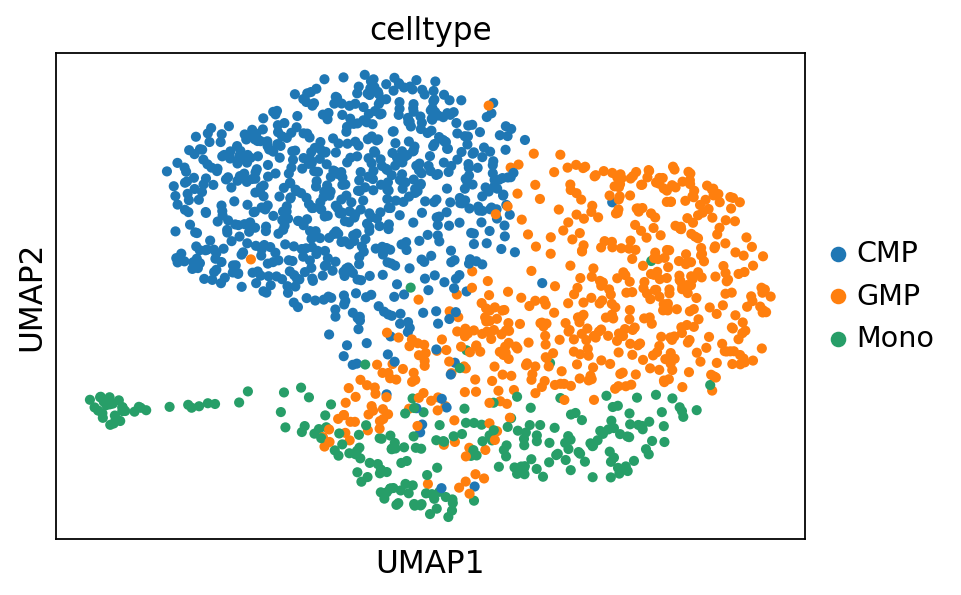

In [10]:
# rename celltype and save
adata.obs['celltype'] = adata.obs['celltype'].replace([5, 7, 10],
                                                     ['CMP', 'GMP', 'Mono'])
sc.pl.umap(adata, color=['celltype'])
adata.write('/home/yiming/vio_analysis/myed18/adata_emb_spl_anno.h5ad')

In [11]:
velo_config = utv.config.Configuration()

In [12]:
velo_config.OFFSET_GENES = True
velo_config.R2_ADJUST = False
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'

-------> Model Configuration Settings <-------

 GPU: 0	BASE_FUNCTION: Gaussian	GENERAL: Curve	
 BASIS: None	N_TOP_GENES: 2000	R2_ADJUST: False	
 OFFSET_GENES: True	FILTER_CELLS: False	EXAMINE_GENE: False	
 RESCALE_TIME: False	RESCALE_DATA: True	IROOT: None	
 NUM_REPEAT: 1	FIT_OPTION: 1	DENSITY: SVD	
 REORDER_CELL: Soft_Reorder	AGGREGATE_T: True	ASSIGN_POS_U: False	
 REG_LOSS: True	REG_TIMES: 0.075	REG_SCALE: 1	
 LEARNING_RATE: 0.01	MAX_ITER: 12000	USE_RAW: False	
 RAW_GENES: False	



  0%|          | 0/2000 [00:00<?, ?it/s]

---> # of velocity genes used 1567
---> # of velocity genes used 1382
---> # of velocity genes used 1363


2022-05-23 11:33:47.094016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-23 11:33:47.125960: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


  0%|          | 0/12000 [00:00<?, ?it/s]

KMT2D
KMT2D
KMT2D


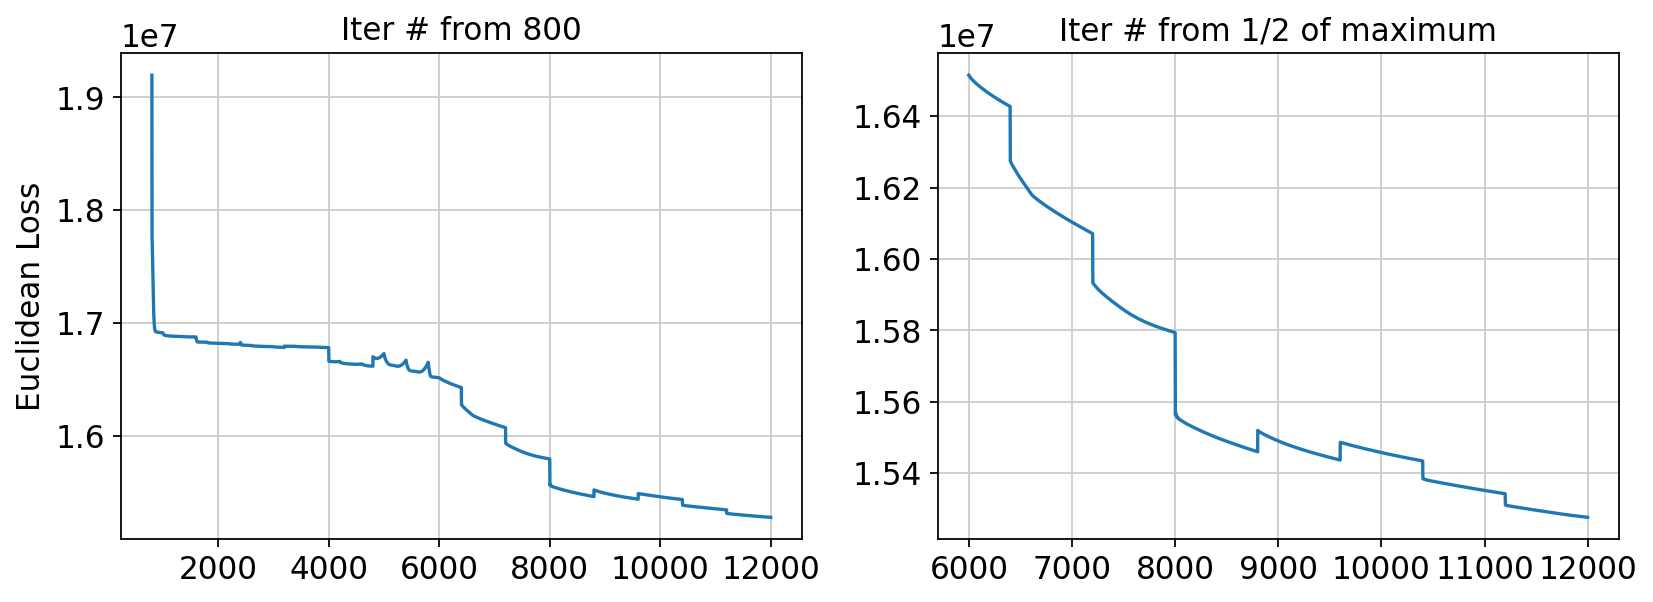

  0%|          | 0/1443 [00:00<?, ?cells/s]

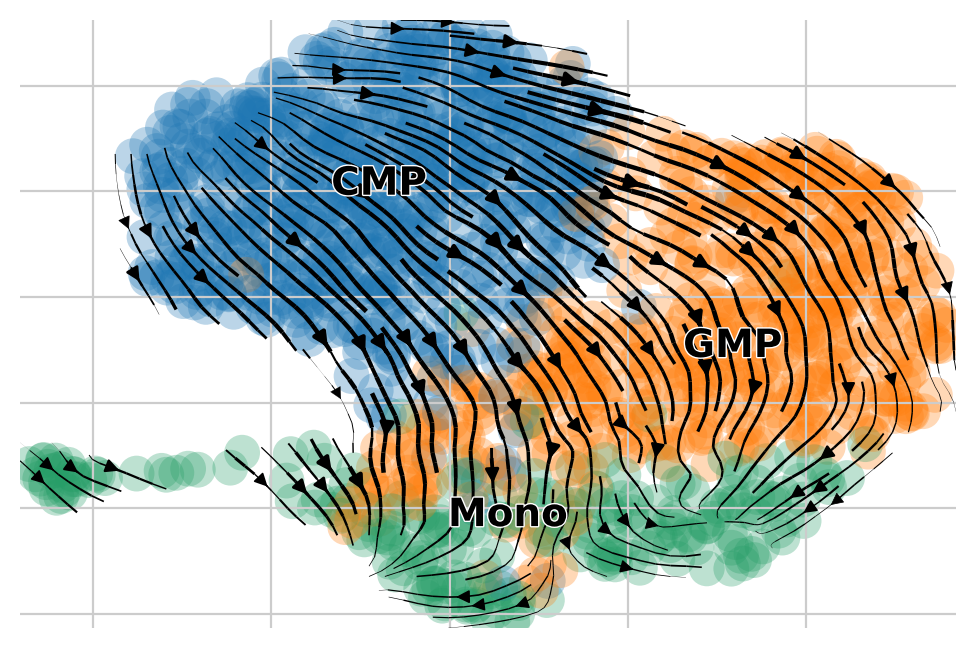

In [13]:
adata_emb_spl = utv.run_model('/home/yiming/vio_analysis/myed18/adata_emb_spl_anno.h5ad', 'celltype', config_file=velo_config)
# adata_emb_spl.uns['celltype_colors'] = sns.color_palette('husl',n_colors=3)
scv.pl.velocity_embedding_stream(adata_emb_spl, color='celltype', dpi=100, title='')

In [3]:
adata_temp = sc.read_h5ad('/home/yiming/vio_analysis/myed18/adata_emb_spl_anno/temp.h5ad')

<AxesSubplot:title={'center':'D18 myelopoiesis'}>

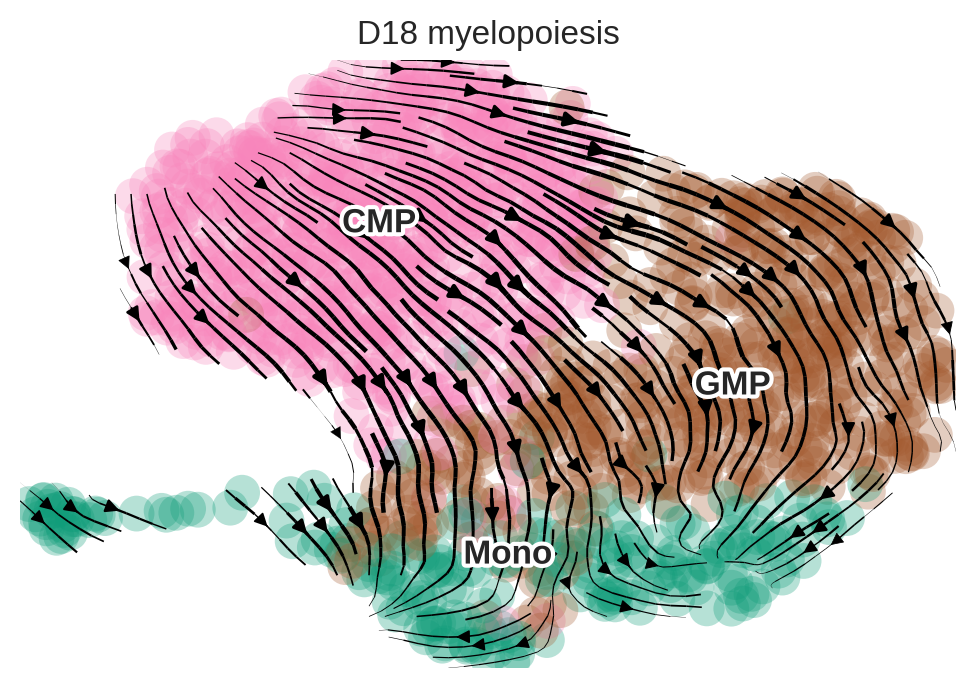

In [4]:
plt.rcParams["figure.figsize"] = (6, 4)
plt.style.use('seaborn-white')
adata_temp.uns['celltype_colors'] = ['#F885BC', '#A45B30', '#109D7A']
scv.pl.velocity_embedding_stream(adata_temp, color=['celltype'], dpi=100, title='D18 myelopoiesis', fontsize=12, 
                                legend_fontsize=12, show=False, legend_fontoutline=3)